In [1]:
!pip install tensorflow==2.16.2 matplotlib==3.9.1 scipy

Reason for being yanked: The Windows wheels, under some conditions, caused segfaults in unrelated user code.  Due to this we deleted the Windows wheels to prevent these segfaults, however this caused greater disruption as pip then began to try (and fail) to build 3.9.1 from the sdist on Windows which impacted far more users.  Yanking the whole release is the only tool available to eliminate these failures without changes to on the user side.  The sdist, OSX wheel, and manylinux wheels are all functional and there are no critical bugs in the release.   Downstream packagers should not yank their builds of Matplotlib 3.9.1.  See https://github.com/matplotlib/matplotlib/issues/28551 for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.8/590.8 MB 20.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 115.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 

In [3]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

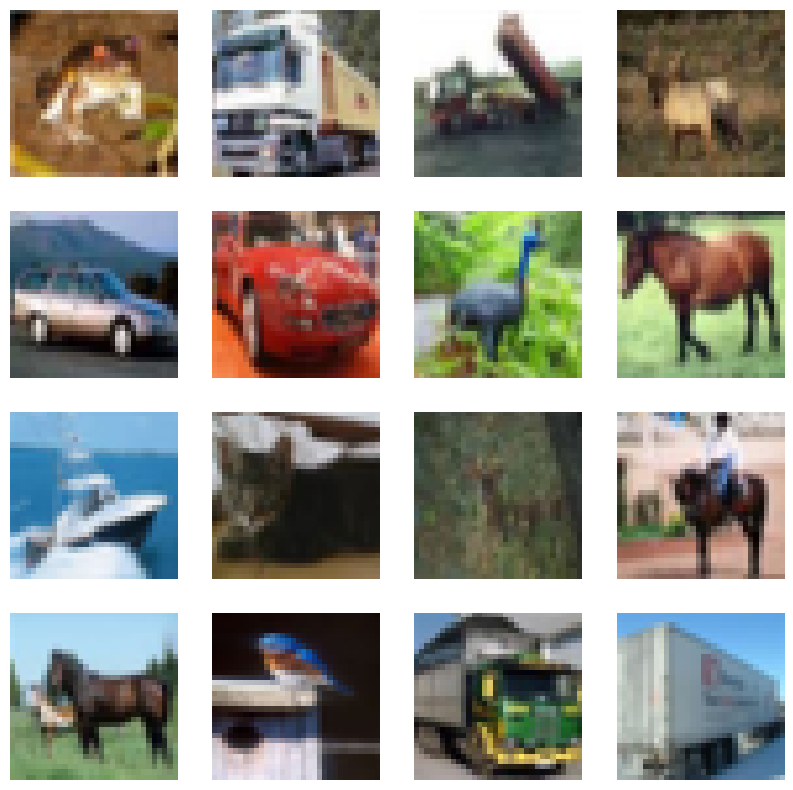

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values for augmentation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Display a sample of the training images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [5]:
from PIL import Image, ImageDraw

image = Image.new('RGB', (224, 224), color = (255, 255, 255))

draw = ImageDraw.Draw(image)
draw.rectangle([(50, 50), (174, 174)], fill=(255, 0, 0))

image.save('sample.jpg')

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array 

# Load a sample image 
img_path = 'sample.jpg' 
img = load_img(img_path) 
x = img_to_array(img) 
x = np.expand_dims(x, axis=0) 

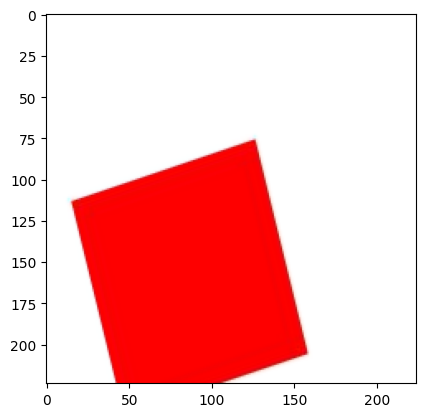

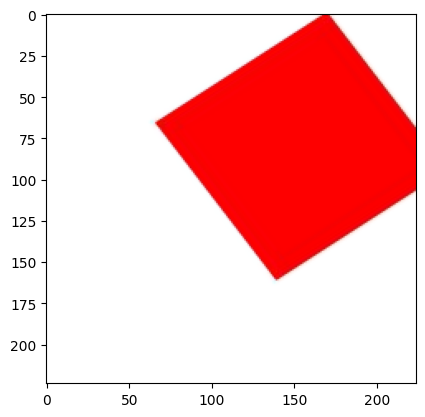

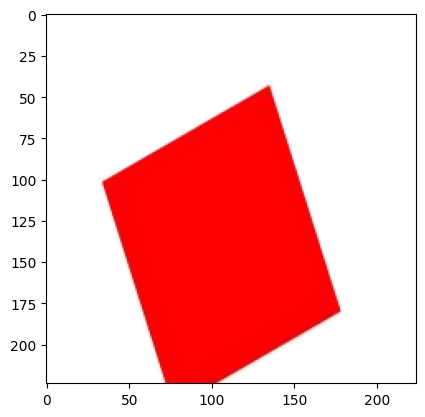

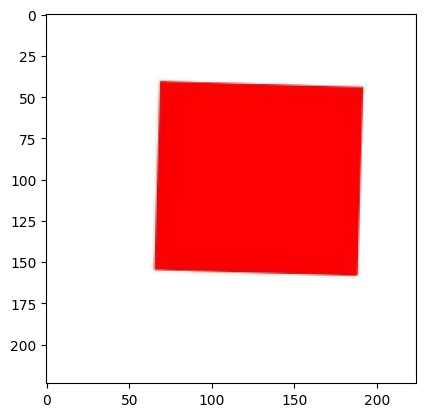

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load the sample image
img_path = 'sample.jpg'
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Create an instance of ImageDataGenerator with basic augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate batches of augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()


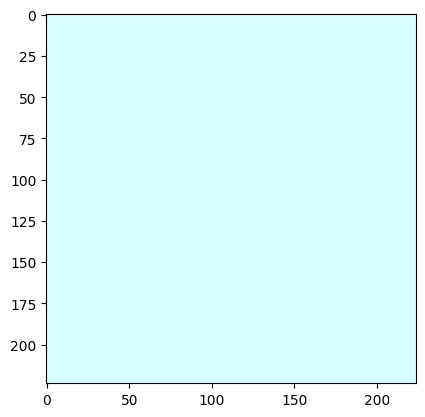

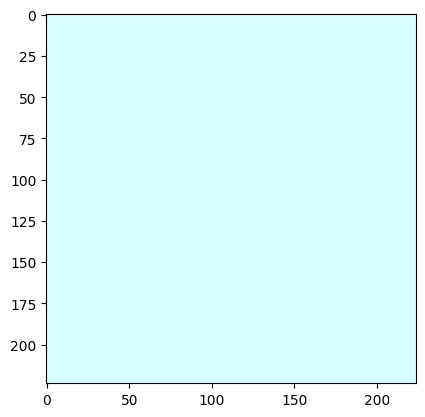

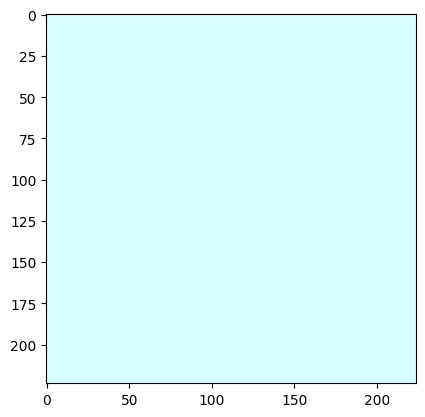

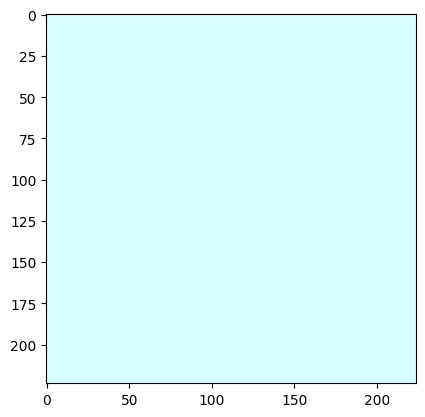

In [8]:
# Create an instance of ImageDataGenerator with normalization options
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Load the sample image again and fit the generator (normally done on the training set)
datagen.fit(x)

# Generate batches of normalized images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

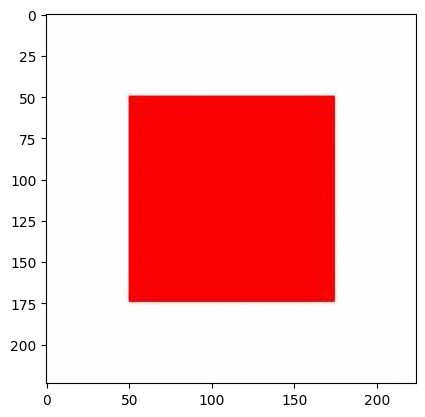

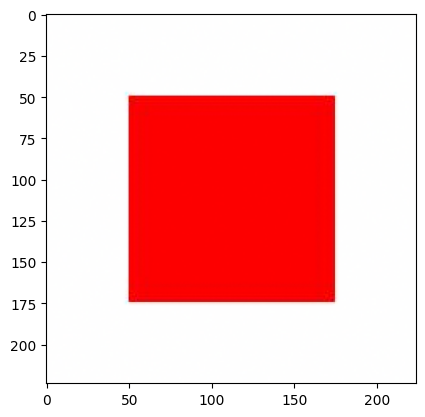

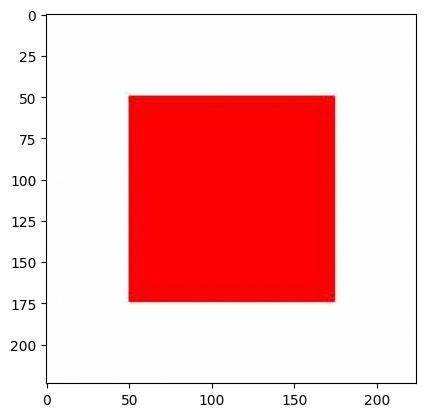

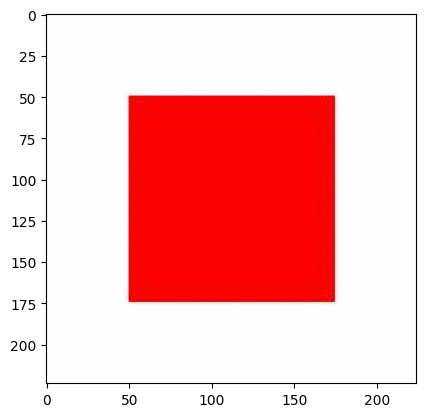

In [9]:
def add_random_noise(image):
    noise = np.random.normal(0, 0.1, image.shape)
    return image + noise

# Create an instance of ImageDataGenerator with the custom augmentation
datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

# Generate batches of augmented images with noise
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

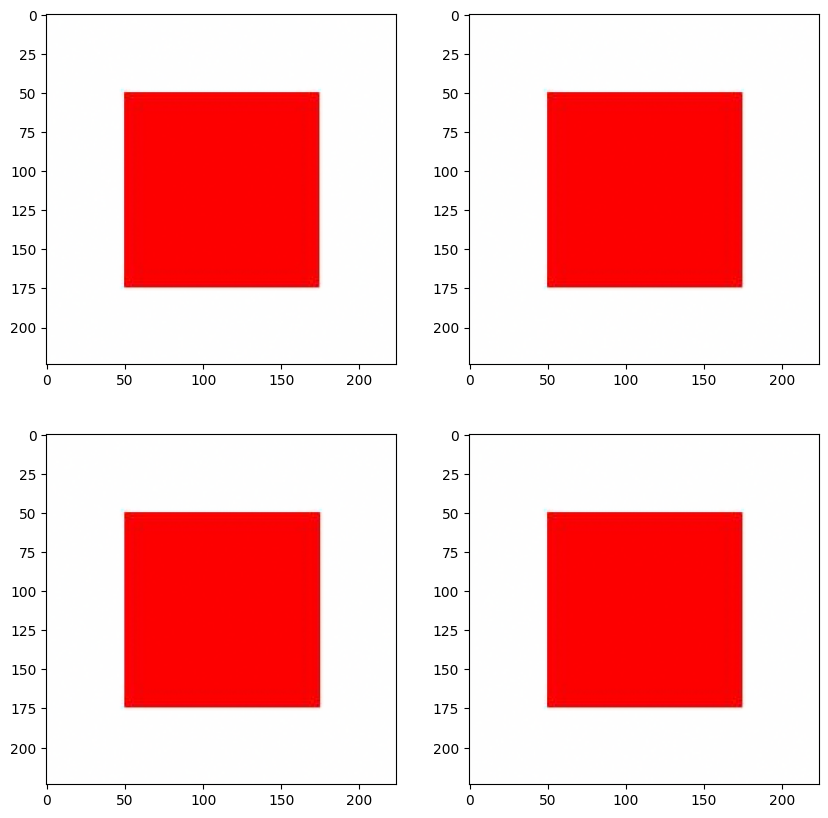

In [10]:
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 4:  # Show only 4 versions
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(batch[0].astype('uint8'))
plt.show()

In [11]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/RgP3JFNtPTZA34UmG3KZaA/sample-images.zip

--2025-05-16 19:37:55--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/RgP3JFNtPTZA34UmG3KZaA/sample-images.zip
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 14868 (15K) [application/zip]
Saving to: ‘sample-images.zip.1’

sample-images.zip.1 100%[===================>]  14.52K  --.-KB/s    in 0s      

2025-05-16 19:37:55 (734 MB/s) - ‘sample-images.zip.1’ saved [14868/14868]



In [14]:
!unzip sample-images.zip -y

Archive:  sample-images.zip
caution: filename not matched:  -y


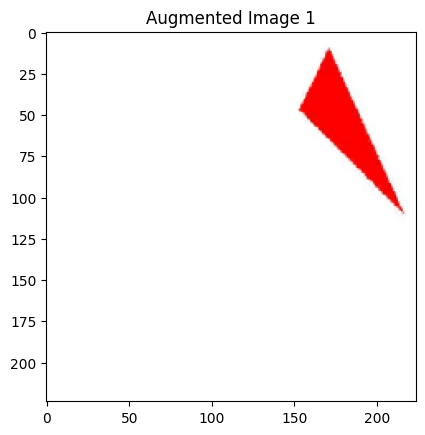

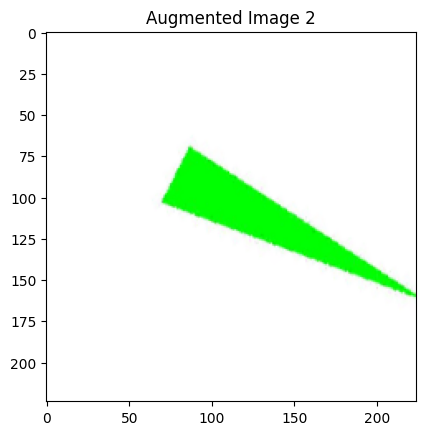

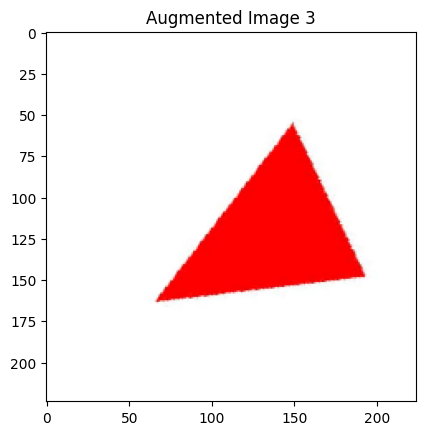

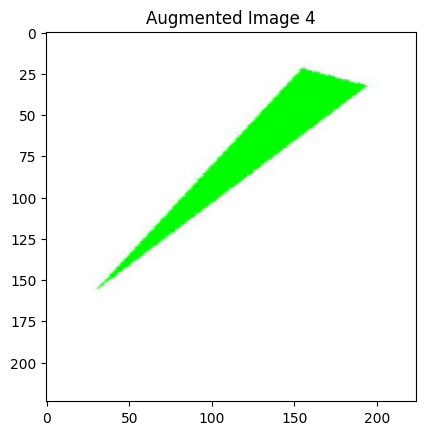

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img  
import matplotlib.pyplot as plt
import numpy as np

datagen = ImageDataGenerator(  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

image_paths = [  
    'sample_images/training_images1.jpg',
    'sample_images/training_images2.jpg',
    'sample_images/training_images3.jpg']  

 

training_images = []
for image_path in image_paths:
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    training_images.append(img_array)
    
training_images = np.array(training_images)

i = 0
for batch in datagen.flow(training_images, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    plt.title(f'Augmented Image {i + 1}')
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

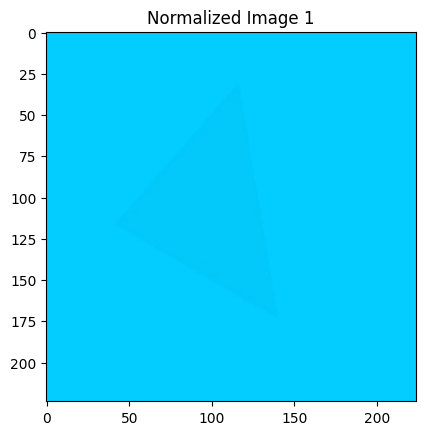

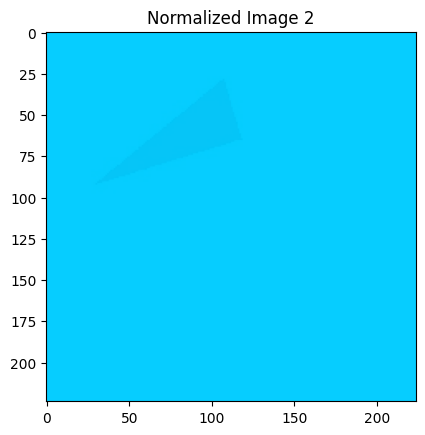

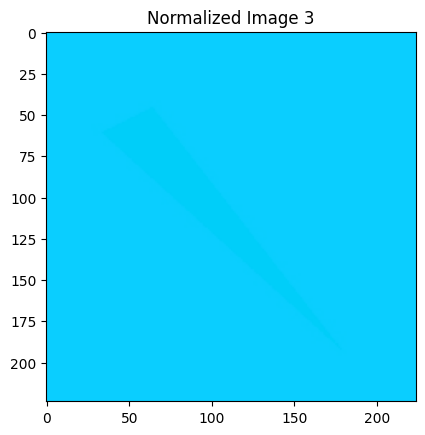

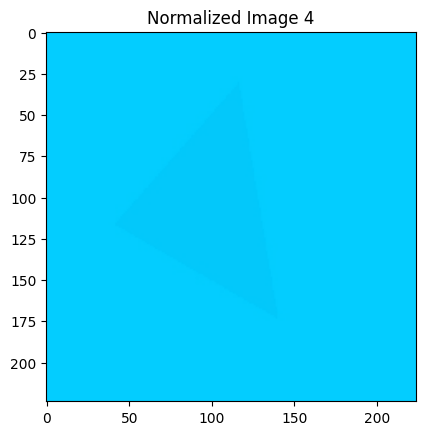

In [16]:
datagen = ImageDataGenerator(  
    featurewise_center=True,  
    featurewise_std_normalization=True,  
    samplewise_center=True,  
    samplewise_std_normalization=True)  

datagen.fit(training_images)  

i = 0 
for batch in datagen.flow(training_images, batch_size=1):  
    plt.figure(i)  
    imgplot = plt.imshow(array_to_img(batch[0]))  
    plt.title(f'Normalized Image {i + 1}')  
    i += 1  
    if i % 4 == 0:  
        break  

plt.show()  

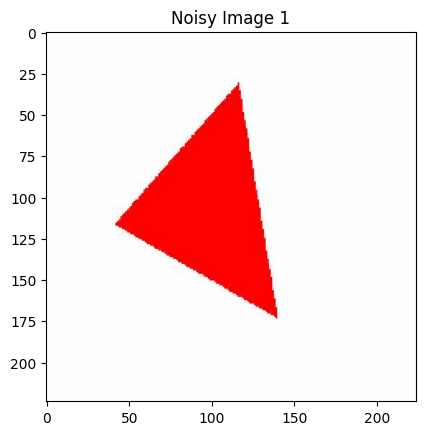

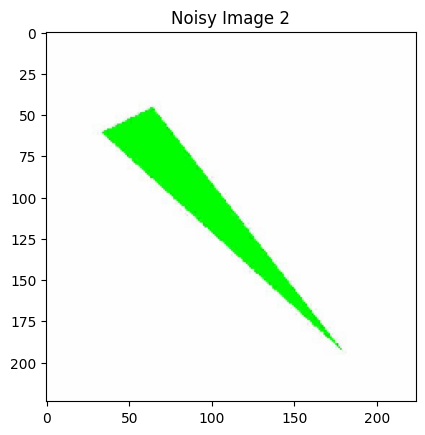

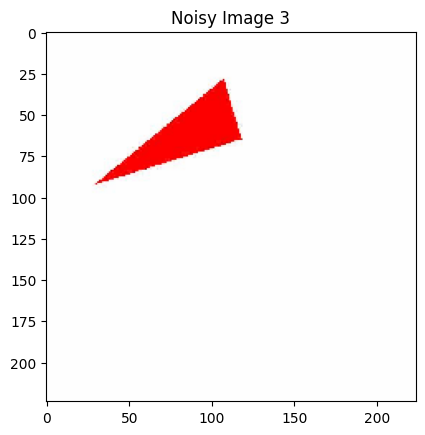

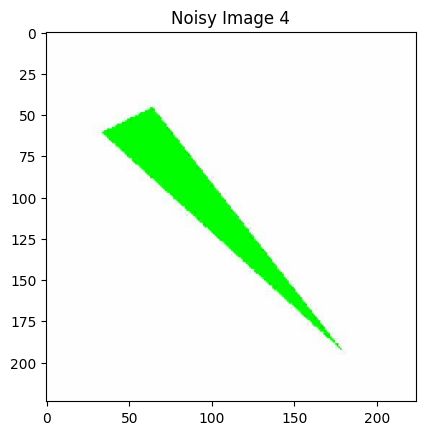

In [17]:
def add_random_noise(image):  
    noise = np.random.normal(0, 0.1, image.shape)  
    return image + noise  

datagen = ImageDataGenerator(preprocessing_function=add_random_noise)  

i = 0  
for batch in datagen.flow(training_images, batch_size=1):  
    plt.figure(i)  
    imgplot = plt.imshow(array_to_img(batch[0]))  
    plt.title(f'Noisy Image {i + 1}')  
    i += 1  
    if i % 4 == 0:  
        break  

plt.show()  